In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('tax_data.csv')
print(df.shape)
df.head(10)

(166452, 165)


,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,785000.0,519980.0,85690.0,165290.0,724170.0,22560.0,...,0.0,0.0,57720.0,46577.0,674840.0,1827202.0,672200.0,1818867.0,2900.0,6089.0
1,1,AL,0,2,554310.0,270870.0,121420.0,146470.0,515150.0,13260.0,...,0.0,0.0,81770.0,112540.0,470410.0,1445383.0,466960.0,1432458.0,4660.0,11648.0
2,1,AL,0,3,290630.0,113280.0,124770.0,44570.0,269700.0,6420.0,...,0.0,0.0,70360.0,144380.0,220710.0,626662.0,216530.0,610170.0,5760.0,16235.0
3,1,AL,0,4,181010.0,42010.0,120820.0,14410.0,168830.0,2570.0,...,0.0,0.0,49500.0,135429.0,130670.0,437179.0,126790.0,419324.0,3730.0,14903.0
4,1,AL,0,5,269080.0,31310.0,224330.0,8270.0,252360.0,3250.0,...,100.0,20.0,103250.0,470206.0,165650.0,724529.0,156910.0,642895.0,11280.0,80064.0
5,1,AL,0,6,81340.0,5000.0,72270.0,630.0,76810.0,230.0,...,41750.0,164094.0,43960.0,1216690.0,34560.0,735671.0,24770.0,285560.0,9630.0,391783.0
6,1,AL,35004,1,1460.0,1010.0,200.0,210.0,1340.0,40.0,...,0.0,0.0,110.0,80.0,1210.0,2807.0,1210.0,2795.0,0.0,0.0
7,1,AL,35004,2,1400.0,760.0,280.0,310.0,1310.0,40.0,...,0.0,0.0,190.0,194.0,1210.0,3378.0,1200.0,3335.0,30.0,62.0
8,1,AL,35004,3,1020.0,460.0,350.0,190.0,970.0,30.0,...,0.0,0.0,230.0,357.0,800.0,2131.0,790.0,2119.0,0.0,0.0
9,1,AL,35004,4,630.0,140.0,420.0,60.0,590.0,0.0,...,0.0,0.0,180.0,386.0,450.0,1282.0,440.0,1276.0,0.0,0.0


In [3]:
df.STATE.value_counts().head(10)

TX    9702
NY    9234
CA    8898
PA    8219
IL    7379
OH    5988
FL    5526
MI    5352
MO    5351
IA    4950
Name: STATE, dtype: int64

In [4]:
#my stuff here

In [5]:
#count missing values
df.isna().sum().sum()

0

In [6]:
#we have no missing values, let's look at the number of zipcodes that are 00000 or 99999
len(df[df.zipcode == 00000])

306

In [7]:
len(df[df.zipcode == 99999])

306

In [8]:
#So the number of zip codes that are 00000 = the number of zipcodes that are 99999
#I will read the documentation to find out why these zip codes exist.
#documentation says that 'ZIP codes with less than 100 returns and those identified as a single building or nonresidential ZIP code were categorized as “other” (99999)'.


In [9]:
#idea: do correct zip code, correct data types conversions
df.dtypes

STATEFIPS      int64
STATE         object
zipcode        int64
agi_stub       int64
N1           float64
              ...   
A11900       float64
N11902       float64
A11902       float64
N12000       float64
A12000       float64
Length: 165, dtype: object

In [10]:
df['Total_Income_Tax_Difference'] = df['A02650'] - df['A04800']

In [11]:
df['Total_Income_Tax_Difference'].describe()

count    1.664520e+05
mean     3.797395e+04
std      7.053047e+05
min     -3.269980e+05
25%      1.719000e+03
50%      5.768500e+03
75%      2.307500e+04
max      9.843056e+07
Name: Total_Income_Tax_Difference, dtype: float64

37,739,000 dollars is the average difference between total income and taxable income. 5,768,000 dollars is the median difference between total income and taxable income.

This tells me the data set is really skewed.

In [12]:
#ideas: box plots for rich, poor people, middle class.
#segreate data 3 ways with qcut.

df['Economic Class'] = pd.qcut(df.Total_Income_Tax_Difference, q=3, labels=['poor', 'middle class', 'rich'])

In [13]:
df.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000,Total_Income_Tax_Difference,Economic Class
0,1,AL,0,1,785000.0,519980.0,85690.0,165290.0,724170.0,22560.0,...,57720.0,46577.0,674840.0,1827202.0,672200.0,1818867.0,2900.0,6089.0,8575147.0,rich
1,1,AL,0,2,554310.0,270870.0,121420.0,146470.0,515150.0,13260.0,...,81770.0,112540.0,470410.0,1445383.0,466960.0,1432458.0,4660.0,11648.0,9831169.0,rich
2,1,AL,0,3,290630.0,113280.0,124770.0,44570.0,269700.0,6420.0,...,70360.0,144380.0,220710.0,626662.0,216530.0,610170.0,5760.0,16235.0,5964512.0,rich
3,1,AL,0,4,181010.0,42010.0,120820.0,14410.0,168830.0,2570.0,...,49500.0,135429.0,130670.0,437179.0,126790.0,419324.0,3730.0,14903.0,4327994.0,rich
4,1,AL,0,5,269080.0,31310.0,224330.0,8270.0,252360.0,3250.0,...,103250.0,470206.0,165650.0,724529.0,156910.0,642895.0,11280.0,80064.0,7550433.0,rich


In [14]:
classTaxDiff = pd.crosstab(df['Total_Income_Tax_Difference'], df['Economic Class'])
classTaxDiff

Economic Class,poor,middle class,rich
Total_Income_Tax_Difference,,,
-326998.0,1,0,0
-139463.0,1,0,0
-101969.0,1,0,0
-86712.0,1,0,0
-72029.0,1,0,0
...,...,...,...
59223891.0,0,0,1
59644171.0,0,0,1
78102234.0,0,0,1


In [15]:
#Idea: check total number of individuals for all tax returns in each state
df.groupby('STATE')['N2'].sum()

STATE
AK     1290970.0
AL     8248810.0
AR     5044920.0
AZ    12465060.0
CA    70327820.0
CO    10269910.0
CT     6368170.0
DC     1050600.0
DE     1787140.0
FL    38268970.0
GA    18570220.0
HI     2468860.0
IA     5628980.0
ID     3376360.0
IL    22379750.0
IN    12086450.0
KS     5210880.0
KY     7535510.0
LA     7556830.0
MA    12236390.0
MD    11031940.0
ME     2406290.0
MI    17575450.0
MN    10349480.0
MO    10779160.0
MS     4880680.0
MT     1920500.0
NC    18358960.0
ND     1352110.0
NE     3526960.0
NH     2519130.0
NJ    16689580.0
NM     3502000.0
NV     5552730.0
NY    34307320.0
OH    20423250.0
OK     6700120.0
OR     7262310.0
PA    22640220.0
RI     1878540.0
SC     9002200.0
SD     1610700.0
TN    12082120.0
TX    52176780.0
UT     6070030.0
VA    15325230.0
VT     1138750.0
WA    13810770.0
WI    10555060.0
WV     2923000.0
WY     1047090.0
Name: N2, dtype: float64

<AxesSubplot: >

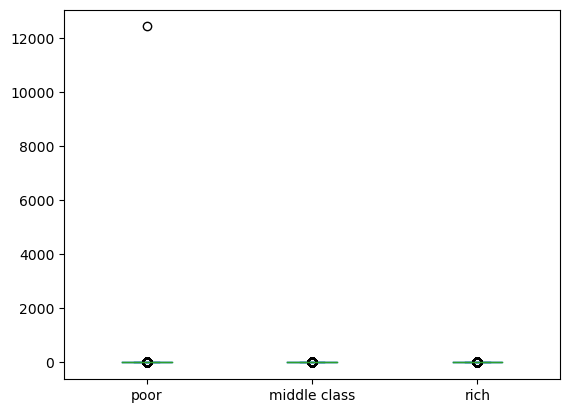

In [16]:
classTaxDiff.plot.box()

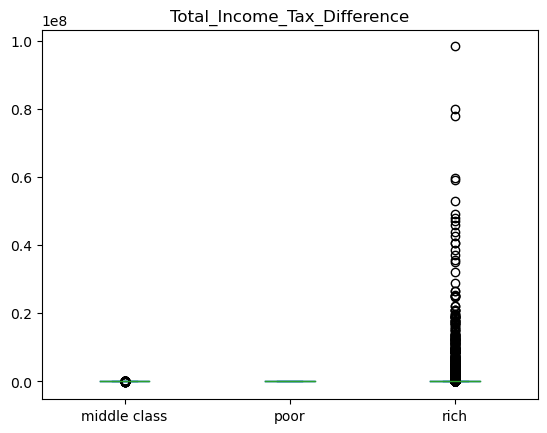

In [17]:
ax = df.plot.box(column='Total_Income_Tax_Difference', by="Economic Class")

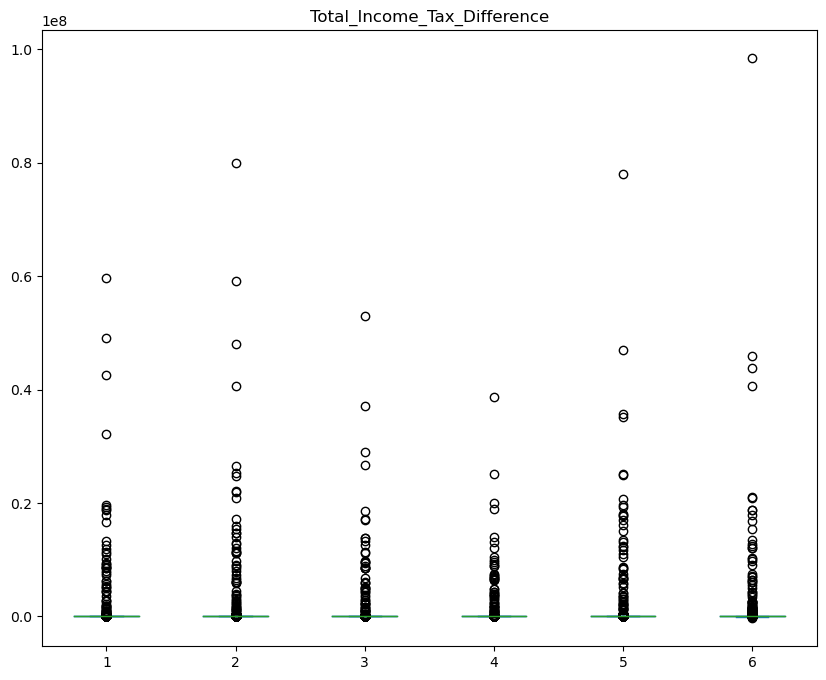

In [18]:
#clearly the way we split the data above for economic classes did not work. Luke just informed me that AGI
#stub is a good way to figure out economic classes. Smart idea by him
#let's make a box plot with that grouping
ax = df.plot.box(column='Total_Income_Tax_Difference', by="agi_stub", figsize=(10, 8))

In [19]:
#Column values are weird for some reason, regardless it seems that the raw total income-taxable income difference doesn't seem to 
#at first to appear to be different between economic groups


In [20]:
#I am curious about the number of returns that do have
#taxable stuff vs the total number of returns
Total_taxable_income_returns = df['N04800'].sum()
Total_returns = df['N1'].sum()
Total_taxable_income_returns / Total_returns

0.8019842884896472

It seems that 80% of all individual income tax returns have taxable income stuff on them. Don't know if this really matters, but will keep here in case it does.

In [21]:
#let's get that for by state (mean for by state)
df['Percentage_Returns_Taxable'] = df['N04800'] / df['N1']

df.groupby('STATE')['Percentage_Returns_Taxable']
#I didn't use median here or we would get 1 everywhere

In [22]:
#let's get the total % of wages and salary that is taxed
df['%SalaryTaxed'] = df['A18300'] / df['A00200']
100*df['%SalaryTaxed'].median() #mean gets us infinity here for some reason

0.41330285687561746

In [23]:
#this is a weird result, says that median % of salary and wages paid in taxes is 0.41

In [24]:
#will quickly check this by state
df.groupby('STATE')['%SalaryTaxed'].median()

STATE
AK    0.002343
AL    0.001436
AR    0.000000
AZ    0.008517
CA    0.020929
CO    0.008646
CT    0.016878
DC    0.019502
DE    0.012263
FL    0.008552
GA    0.010241
HI    0.016592
IA    0.000000
ID    0.000000
IL    0.000000
IN    0.000000
KS    0.000000
KY    0.000000
LA    0.001564
MA    0.016754
MD    0.024012
ME    0.000000
MI    0.003898
MN    0.000000
MO    0.000000
MS    0.000000
MT    0.000000
NC    0.005986
ND    0.000000
NE    0.000000
NH    0.007293
NJ    0.023743
NM    0.000000
NV    0.008101
NY    0.008376
OH    0.000809
OK    0.000000
OR    0.014613
PA    0.000000
RI    0.014998
SC    0.005346
SD    0.000000
TN    0.000000
TX    0.005472
UT    0.009097
VA    0.006963
VT    0.000000
WA    0.009198
WI    0.003244
WV    0.000000
WY    0.000000
Name: %SalaryTaxed, dtype: float64

In [25]:
#same result for states as for total.

In [2]:
#test edit by josh to test if permissons are working